# Parameter series for M/M/c model

This notebook shows the effect of different average service times in a M/M/c model on the waiting times.

## Importing modules

In [1]:
# Data collection
import pandas as pd

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Simulation
from queuesim import SimProcess, run_parallel, get_multi_run_info
from queuesim.models import mmc_model

# Analytic calcution
from queuesim.analytic import erlang_c_table

# Defining general plot style
sns.set()

## Model parameters

In [2]:
# Mean inter-arrival time
mean_i = 100

# Mean service time range
mean_s_range = range(70, 93)

# Number of operators
c = 1

# Number of arrivals to be simulated
count = 100_000

## Parallel simulation of the M/M/c models with E[I]=100, c=1 and E[S]=70,71,...,92 each with 100,000 arrivals

In [3]:
models, simulators = run_parallel([SimProcess(mmc_model(mean_i, mean_s, c, count)) for mean_s in mean_s_range])

23 parallel processes started.
All processes terminated, runtime: 80.7 seconds.
Results have been collected.


## Processing results

In [4]:
mu = [1 / model['meanS'] for model in models]
rho = [model['meanS'] / model['meanI'] / model['c'] for model in models]
ENQ = [model['Process'].statistic_queue_length.mean for model in models]
EN = [model['Process'].statistic_wip.mean for model in models]
EW = [model['Dispose'].statistic_client_waiting.mean for model in models]
EV = [model['Dispose'].statistic_client_residence.mean for model in models]

results = pd.DataFrame({'mu': mu, 'rho': rho, 'E[N_Q]': ENQ, 'E[N]': EN, 'E[W]': EW, 'E[V]': EV})

results

,mu,rho,E[N_Q],E[N],E[W],E[V]
0,0.014286,0.70,1.657026,2.357947,165.449937,235.435164
1,0.014085,0.71,1.724834,2.434036,172.436446,243.337393
2,0.013889,0.72,1.939730,2.661501,193.532726,265.545994
3,0.013699,0.73,1.958694,2.691125,196.200788,269.567813
4,0.013514,0.74,2.095143,2.833997,209.386931,283.227394
5,0.013333,0.75,2.258423,3.016070,224.956402,300.423811
6,0.013158,0.76,2.313479,3.073300,231.459117,307.477710
7,0.012987,0.77,2.749129,3.523469,274.656456,352.018220
8,0.012821,0.78,2.733652,3.510460,273.664846,351.430702
9,0.012658,0.79,2.914674,3.707371,291.008303,370.153180


## Calculating Erlang C formula results

In [5]:
parameter = [(1 / mean_i, mu, c) for mu in results["mu"]]
erlang_c_results = erlang_c_table(parameter)

## Plotting results

In [6]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

Text(0.5, 1.0, 'Mean waiting time as a function of the utilization')

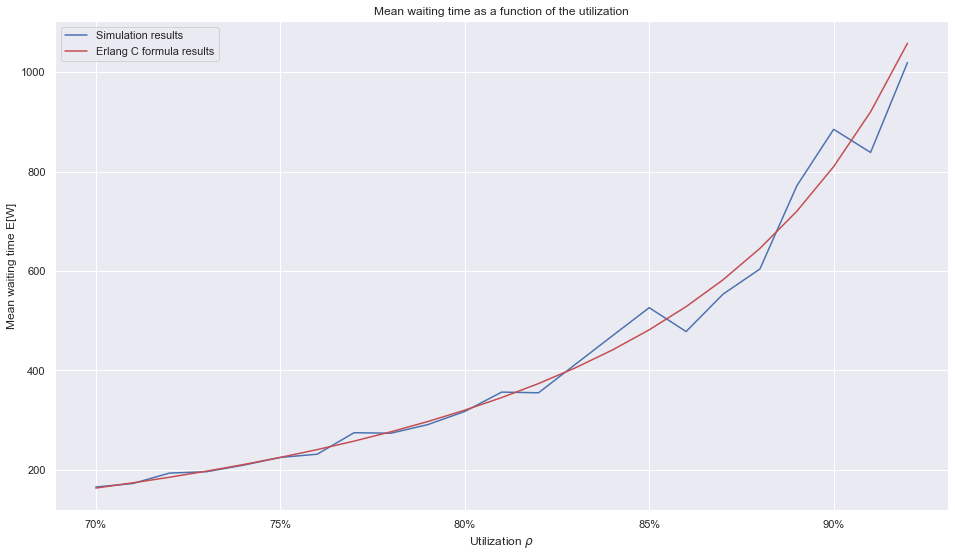

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(results['rho'], results['E[W]'], 'b', label="Simulation results")
ax.plot(erlang_c_results['rho'], erlang_c_results['E[W]'], 'r', label="Erlang C formula results")

ax.xaxis.set_major_formatter(formater.PercentFormatter(xmax=1, decimals=0))
ax.set_xlabel("Utilization $\\rho$")
ax.set_ylabel("Mean waiting time E[W]")
ax.legend()

ax.set_title("Mean waiting time as a function of the utilization")

## Simulation runtimes

In [8]:
print(get_multi_run_info([model['Source'] for model in models], simulators))

Models: 23
Client arrivals (total): 2.3 millons
Computing time (total): 14.0 Sekunden
Computing time per client (real): 129.2 µs


### Runtime

* total = Maximum of the computing times of the individual processes
* real = Computing time per client on a single CPU core (dividing this value by the number of CPU cores is total output)